In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import time
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print(f'All libraries loaded successfully')

All libraries loaded successfully


In [2]:
# Data loading

file_location = "/home/buzzpro/Desktop/ECE421/Assignment2/a2/notMNIST.npz"
def loadData():
    with np.load(file_location) as data:
        Data, Target = data["images"], data["labels"]
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data = Data[randIndx] / 255.0
        Target = Target[randIndx]
        trainData, trainTarget = Data[:10000], Target[:10000]
        validData, validTarget = Data[10000:16000], Target[10000:16000]
        testData, testTarget = Data[16000:], Target[16000:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget


trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
print(f'Data loaded successfully.')


# to convert targets to one-hot
def convertOneHot(trainTarget, validTarget, testTarget):
    newtrain = np.zeros((trainTarget.shape[0], 10))
    newvalid = np.zeros((validTarget.shape[0], 10))
    newtest = np.zeros((testTarget.shape[0], 10))

    for item in range(0, trainTarget.shape[0]):
        newtrain[item][trainTarget[item]] = 1
    for item in range(0, validTarget.shape[0]):
        newvalid[item][validTarget[item]] = 1
    for item in range(0, testTarget.shape[0]):
        newtest[item][testTarget[item]] = 1
    return newtrain, newvalid, newtest

Data loaded successfully.


In [3]:
print(f'Train data shape = {trainData.shape}')
print(f'Train target shape = {trainTarget.shape}')

print(f'Validation data shape = {validData.shape}')
print(f'Validation target shape = {validTarget.shape}')

print(f'Test data shape = {testData.shape}')
print(f'Test target shape = {testTarget.shape}')

# reshape to put into NHWC format
trainData = np.reshape(trainData, (trainData.shape[0], trainData.shape[1],\
                                  trainData.shape[2], 1))

validData = np.reshape(validData, (validData.shape[0], validData.shape[1],\
                                  validData.shape[2], 1))


testData = np.reshape(testData, (testData.shape[0], testData.shape[1],\
                                  testData.shape[2], 1))

# converting targets to one-hot

trainTarget_old = trainTarget.copy()
validTarget_old = validTarget.copy()
testTarget_old = testTarget.copy()

trainTarget, validTarget, testTarget = convertOneHot(trainTarget, validTarget, testTarget)


print(f'After reshaping to NHWC and one-hot targets...')
print(f'Train data shape = {trainData.shape}')
print(f'Train target shape = {trainTarget.shape}')

print(f'Validation data shape = {validData.shape}')
print(f'Validation target shape = {validTarget.shape}')

print(f'Test data shape = {testData.shape}')
print(f'Test target shape = {testTarget.shape}')

Train data shape = (10000, 28, 28)
Train target shape = (10000,)
Validation data shape = (6000, 28, 28)
Validation target shape = (6000,)
Test data shape = (2724, 28, 28)
Test target shape = (2724,)
After reshaping to NHWC and one-hot targets...
Train data shape = (10000, 28, 28, 1)
Train target shape = (10000, 10)
Validation data shape = (6000, 28, 28, 1)
Validation target shape = (6000, 10)
Test data shape = (2724, 28, 28, 1)
Test target shape = (2724, 10)


In [4]:
# keras model

model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=3, strides=1,padding="same",\
                        data_format="channels_last", activation="relu", use_bias=True,\
                          kernel_initializer="glorot_normal", bias_initializer="glorot_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), padding="same", strides=None),
    keras.layers.Flatten(),
    keras.layers.Dense(units=784, activation="relu", use_bias=True, kernel_initializer="glorot_normal",\
                       bias_initializer="glorot_normal"),
    keras.layers.Dense(units=10, use_bias=True, kernel_initializer="glorot_normal",\
                       bias_initializer="glorot_normal"),
    keras.layers.Softmax()
    
])

print(f'Model setup complete.')

Model setup complete.


In [5]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),\
              loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# categorical cross entropy is used when classes are 2 or more, use default params for Adam
print(f'Model compiled.')

Model compiled.


In [6]:
# Part 2.2 train model

test_loss_p22 = []
test_acc_p22 = []

class GetTestMetrics(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss, acc = self.model.evaluate(testData, testTarget, batch_size=32, verbose=0)
        test_loss_p22.append(loss)
        test_acc_p22.append(acc)
        print(f'Test loss = {loss}, Test acc = {acc}')
        
progress = model.fit(trainData, trainTarget, batch_size=32, epochs=50,\
          validation_data=(validData, validTarget), shuffle=True, callbacks=[GetTestMetrics()])

Train on 10000 samples, validate on 6000 samples
Epoch 1/50
10000/10000 [==============================] - 5s 460us/sample - loss: 0.4353 - accuracy: 0.8751 - val_loss: 0.5792 - val_accuracy: 0.8842
Epoch 2/50
10000/10000 [==============================] - 3s 305us/sample - loss: 0.1833 - accuracy: 0.9471 - val_loss: 0.3054 - val_accuracy: 0.9102
Epoch 3/50
10000/10000 [==============================] - 3s 299us/sample - loss: 0.1042 - accuracy: 0.9723 - val_loss: 0.2918 - val_accuracy: 0.9155
Epoch 4/50
10000/10000 [==============================] - 3s 297us/sample - loss: 0.0580 - accuracy: 0.9851 - val_loss: 0.2998 - val_accuracy: 0.9238
Epoch 5/50
10000/10000 [==============================] - 3s 296us/sample - loss: 0.0444 - accuracy: 0.9886 - val_loss: 0.3049 - val_accuracy: 0.9218
Epoch 6/50
10000/10000 [==============================] - 3s 299us/sample - loss: 0.0324 - accuracy: 0.9928 - val_loss: 0.3240 - val_accuracy: 0.9212
Epoch 7/50
10000/10000 [===========================

10000/10000 [==============================] - 3s 291us/sample - loss: 0.0105 - accuracy: 0.9976 - val_loss: 0.4310 - val_accuracy: 0.9260
Epoch 29/50
10000/10000 [==============================] - 3s 302us/sample - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.4007 - val_accuracy: 0.9280
Epoch 30/50
10000/10000 [==============================] - 3s 293us/sample - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.4092 - val_accuracy: 0.9275
Epoch 31/50
10000/10000 [==============================] - 3s 303us/sample - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.4052 - val_accuracy: 0.9297
Epoch 32/50
10000/10000 [==============================] - 3s 293us/sample - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.3971 - val_accuracy: 0.9293
Epoch 33/50
10000/10000 [==============================] - 3s 305us/sample - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.4003 - val_accuracy: 0.9300
Epoch 34/50
10000/10000 [==============================] - 3s 295us/sample - loss: 0.0050 - accuracy: 0.99

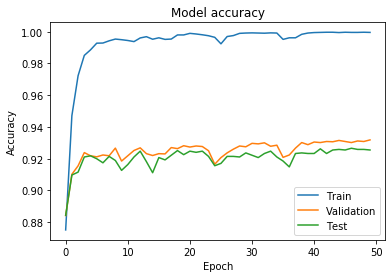

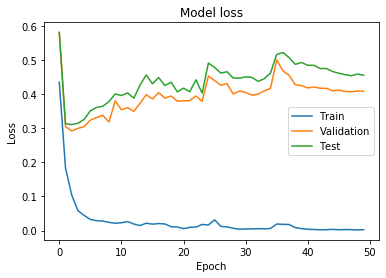

In [7]:
# Plots for 2.2

# accuracy curves
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.plot(test_acc_p22)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='best')
plt.show()

# loss curves
plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.plot(test_loss_p22)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='best')
plt.show()

In [12]:
# 2.3 part 1

# keras model with l2 regularizer

reg = [0.01, 0.1, 0.5]

final_train_loss = []
final_train_acc = []
final_valid_loss = []
final_valid_acc = []
final_test_loss = []
final_test_acc = []

for set_regular in reg:
    model = keras.Sequential([
        keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=3, strides=1,padding="same",\
                            data_format="channels_last", activation="relu", use_bias=True,\
                              kernel_initializer="glorot_normal", bias_initializer="glorot_normal"), # None means infer
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(2,2), padding="same", strides=None), # None means use default
        keras.layers.Flatten(),
        keras.layers.Dense(units=784, activation="relu", use_bias=True, kernel_initializer="glorot_normal",\
                           bias_initializer="glorot_normal", kernel_regularizer=keras.regularizers.l2(set_regular),\
                          bias_regularizer=keras.regularizers.l2(set_regular)),
        keras.layers.Dense(units=10, use_bias=True, kernel_initializer="glorot_normal",\
                           bias_initializer="glorot_normal", kernel_regularizer=keras.regularizers.l2(set_regular),\
                          bias_regularizer=keras.regularizers.l2(set_regular)),
        keras.layers.Softmax()

    ])

    print(f'Model setup complete with l2 regularizer with value {set_regular}')

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),\
                  loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

    # categorical cross entropy is used when classes are 2 or more, use default params for Adam
    print(f'Model compiled with l2 regularizer with value {set_regular}.')
    
    
    progress = model.fit(trainData, trainTarget, batch_size=32, epochs=50,\
          validation_data=(testData, testTarget), shuffle=True, verbose=0)
    
    print(f'Training complete.')
    
    final_train_loss.append((progress.history['loss'])[-1])
    final_train_acc.append(progress.history['accuracy'][-1])
    
    final_test_loss.append(progress.history['val_loss'][-1])
    final_test_acc.append(progress.history['val_accuracy'][-1])
    
    temp_val_loss, temp_val_acc = model.evaluate(validData, validTarget, batch_size=32,\
                                                verbose=0)
    final_valid_loss.append(temp_val_loss)
    final_valid_acc.append(temp_val_acc)
    
    print(f'Recorded final results.')
    



Model setup complete with l2 regularizer with value 0.01
Model compiled with l2 regularizer with value 0.01.
Training complete.
Recorded final results.
Model setup complete with l2 regularizer with value 0.1
Model compiled with l2 regularizer with value 0.1.
Training complete.
Recorded final results.
Model setup complete with l2 regularizer with value 0.5
Model compiled with l2 regularizer with value 0.5.
Training complete.
Recorded final results.


In [13]:
print(f'For reg = {reg[0]},')
print(f'Final train loss = {final_train_loss[0]}')
print(f'Final train accuracy = {final_train_acc[0]}')

print(f'Final validation loss = {final_valid_loss[0]}')
print(f'Final validation accuracy = {final_valid_acc[0]}')

print(f'Final test loss = {final_test_loss[0]}')
print(f'Final test accuracy = {final_test_acc[0]}')

print('----------------------------------------------------')

print(f'For reg = {reg[1]},')
print(f'Final train loss = {final_train_loss[1]}')
print(f'Final train accuracy = {final_train_acc[1]}')

print(f'Final validation loss = {final_valid_loss[1]}')
print(f'Final validation accuracy = {final_valid_acc[1]}')

print(f'Final test loss = {final_test_loss[1]}')
print(f'Final test accuracy = {final_test_acc[1]}')

print('----------------------------------------------------')

print(f'For reg = {reg[2]},')
print(f'Final train loss = {final_train_loss[2]}')
print(f'Final train accuracy = {final_train_acc[2]}')

print(f'Final validation loss = {final_valid_loss[2]}')
print(f'Final validation accuracy = {final_valid_acc[2]}')

print(f'Final test loss = {final_test_loss[2]}')
print(f'Final test accuracy = {final_test_acc[2]}')

For reg = 0.01,
Final train loss = 0.18600476067066193
Final train accuracy = 0.9851999878883362
Final validation loss = 0.358395014444987
Final validation accuracy = 0.9303333163261414
Final test loss = 0.3737385141254347
Final test accuracy = 0.9284141063690186
----------------------------------------------------
For reg = 0.1,
Final train loss = 0.4915312662124634
Final train accuracy = 0.930899977684021
Final validation loss = 0.5267671669324239
Final validation accuracy = 0.9193333387374878
Final test loss = 0.5189385828117618
Final test accuracy = 0.9240087866783142
----------------------------------------------------
For reg = 0.5,
Final train loss = 0.9747252080917358
Final train accuracy = 0.883899986743927
Final validation loss = 0.9804146107037862
Final validation accuracy = 0.8896666765213013
Final test loss = 0.9738260946960001
Final test accuracy = 0.8924375772476196


----------------------------------------------------
Model setup complete with dropout value 0.9
Model compiled with dropout value 0.9.
Training complete.


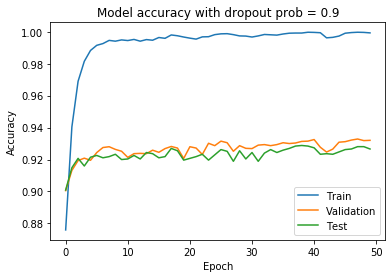

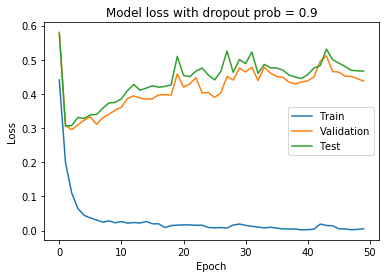

Recorded final results.
----------------------------------------------------
Model setup complete with dropout value 0.75
Model compiled with dropout value 0.75.
Training complete.


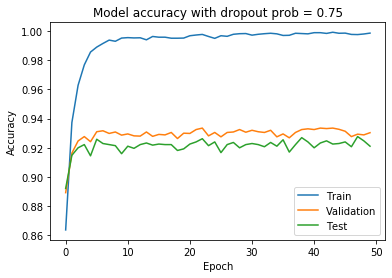

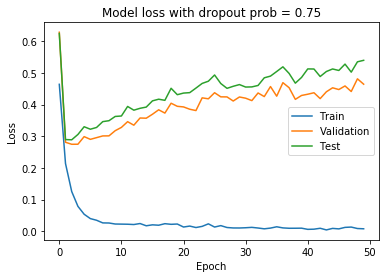

Recorded final results.
----------------------------------------------------
Model setup complete with dropout value 0.5
Model compiled with dropout value 0.5.
Training complete.


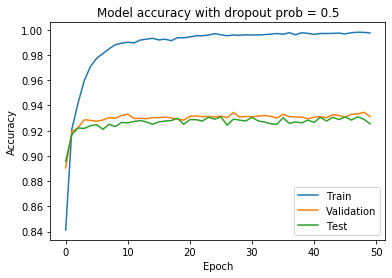

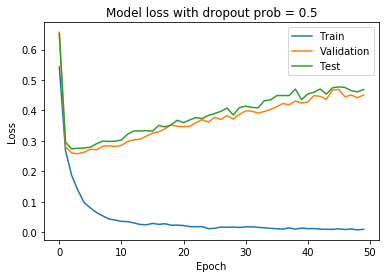

Recorded final results.


In [9]:
# 2.3 part 2

# keras model with dropout

# in tensorflow 2.x, dropout probability param has changed to "fractions of inputs to drop"
p = [0.1, 1-0.75, 0.5]


class GetTestMetricsP232(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss, acc = self.model.evaluate(testData, testTarget, batch_size=32, verbose=0)
        test_loss_p232.append(loss)
        test_acc_p232.append(acc)
        #print(f'Test loss = {loss}, Test acc = {acc}')

final_train_loss = []
final_train_acc = []
final_valid_loss = []
final_valid_acc = []
final_test_loss = []
final_test_acc = []

for prob in p:
    model = keras.Sequential([
        keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=3, strides=1,padding="same",\
                            data_format="channels_last", activation="relu", use_bias=True,\
                              kernel_initializer="glorot_normal", bias_initializer="glorot_normal"), # None means infer
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(2,2), padding="same", strides=None), # None means use default
        keras.layers.Flatten(),
        keras.layers.Dense(units=784, activation="relu", use_bias=True, kernel_initializer="glorot_normal",\
                           bias_initializer="glorot_normal"),
        keras.layers.Dropout(rate=prob),
        keras.layers.Dense(units=10, use_bias=True, kernel_initializer="glorot_normal",\
                           bias_initializer="glorot_normal"),
        keras.layers.Softmax()

    ])
    
    print('----------------------------------------------------')
    print(f'Model setup complete with dropout value {1-prob}')

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),\
                  loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

    # categorical cross entropy is used when classes are 2 or more, use default params for Adam
    print(f'Model compiled with dropout value {1-prob}.')
    
    test_loss_p232 = []   # reset the lists at every prob 
    test_acc_p232 = []
    
    progress = model.fit(trainData, trainTarget, batch_size=32, epochs=50,\
          validation_data=(validData, validTarget), shuffle=True, verbose=0,\
                         callbacks=[GetTestMetricsP232()])
    
    print(f'Training complete.')
    
    # accuracy curves
    plt.plot(progress.history['accuracy'])
    plt.plot(progress.history['val_accuracy'])
    plt.plot(test_acc_p232)
    plt.title(f'Model accuracy with dropout prob = {1-prob}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation','Test'], loc='best')
    plt.show()
    
    # loss curves
    plt.plot(progress.history['loss'])
    plt.plot(progress.history['val_loss'])
    plt.plot(test_loss_p232)
    plt.title(f'Model loss with dropout prob = {1-prob}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation', 'Test'], loc='best')
    plt.show()
    
    final_train_loss.append((progress.history['loss'])[-1])
    final_train_acc.append(progress.history['accuracy'][-1])
    
    final_valid_loss.append(progress.history['val_loss'][-1])
    final_valid_acc.append(progress.history['val_accuracy'][-1])
    
    final_test_loss.append(test_loss_p232[-1])
    final_test_acc.append(test_acc_p232[-1])
    
    print(f'Recorded final results.')
    

